# 주제: 가위바위보 분류하기

## 데이터
train data: 직접 찍은 가위, 바위, 보 사진 각각 365장 총 1095장  
test data: 다른 사람들의 가위, 바위, 보 사진 각각 100장 총 300장, 3번 시도  

## 목표
1. 여러가지 평가지표 시각화하기 (train acc / train loss / val acc / val loss )
2. 오버피팅을 극복하기 위해 다양한 데이터셋 사용, 정규화, 모델구성 변화 등 시도하기
3. 정확도 60% 넘기기!!

### (1) 라이브러리 불러오기

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### (2) 데이터 전처리
모든 이미지를 28x28 사이즈로 바꾸고 픽셀값을 0~1 사이의 값으로 정규화한다

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

365  images to be resized.
365  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

365  images to be resized.
365  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

365  images to be resized.
365  images resized.
보 이미지 resize 완료!


In [6]:
import numpy as np

def load_data(img_path, number_of_data=1095):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1095 입니다.
x_train shape: (1095, 28, 28, 3)
y_train shape: (1095,)


라벨:  1


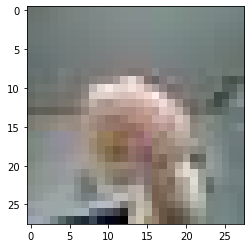

In [7]:
import matplotlib.pyplot as plt

index = 566
plt.imshow(x_train[index])
print('라벨: ', y_train[index])

### (3) train, val 데이터 나누기

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### (4) 모델 구성하기

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# [[YOUR CODE]]
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=11

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### (5) 모델 컴파일 및 학습하기 

In [10]:
# 모델 컴파일
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/10
88/88 [==============================] - 34s 7ms/step - loss: 0.9879 - accuracy: 0.5411 - val_loss: 0.8013 - val_accuracy: 0.7443
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.7660 - val_loss: 0.4972 - val_accuracy: 0.8402
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8664 - val_loss: 0.3306 - val_accuracy: 0.8813
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.9178 - val_loss: 0.2876 - val_accuracy: 0.8858
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9463 - val_loss: 0.1889 - val_accuracy: 0.9224
Epoch 6/10
88/88 [==============================] - 0s 4ms/step - loss: 0.1044 - accuracy: 0.9692 - val_loss: 0.2054 - val_accuracy: 0.9269
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.9737 - val_loss: 0.1293 - val_accuracy: 0.9498
Epoch 8/10
88/88 [=

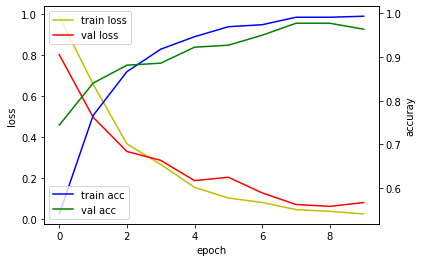

In [11]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### (6) 테스트용 데이터 불러오기

In [12]:
# [[YOUR CODE]]
#테스트용 사진 resize

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

#바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

#보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### (7) 평가하기

In [13]:
# [[YOUR CODE]]
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 436.8086 - accuracy: 0.3733
test_loss: 436.8085632324219 
test_accuracy: 0.3733333349227905


-> 가이드라인대로 시도하니 37%의 정확도가 나왔다. 여러 시도를 통하여 정확도를 개선해보아야겠다

### (8) 더 좋은 결과를 위한 시도들
#### 1. 모델 구성을 바꾸기

In [14]:
n_channel_1=32
n_channel_2=64
n_dense=256
n_train_epoch=11

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.9989 - val_loss: 0.1946 - val_accuracy: 0.9909
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.1273 - accuracy: 0.9886 - val_loss: 0.5331 - val_accuracy: 0.8813
Epoch 3/10
88/88 [==============================] - 0s 5ms/step - loss: 0.1326 - accuracy: 0.9760 - val_loss: 0.0316 - val_accuracy: 0.9863
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0091 - accuracy: 0.9966 - val_loss: 0.0678 - val_accuracy: 0.9909
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9966 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/10
88/88 [==============================] - 0s 5ms/step - loss: 9.9179e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/10
88/88

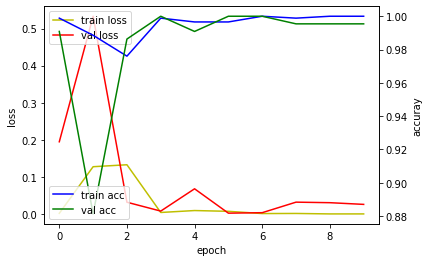

In [31]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [32]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2243.7568 - accuracy: 0.4000
test_loss: 2243.7568359375 
test_accuracy: 0.4000000059604645


-> 모델 구성을 바꾸어본 결과 40%로 조금 더 나은 결과를 얻을 수 있었다. 매번 시도할때마다 정확도가 30~45% 사이로 불안정하게 바뀐다.

#### 2. 다른 데이터로도 평가해보기
b_test데이터 사용 + 모델 구성 바꾸기 및 하이퍼 파라미터 수정(3번 시도)

In [33]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)

#바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/rock"
resize_images(image_dir_path)

#보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [34]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 3313.9680 - accuracy: 0.5133
test_loss: 3313.968017578125 
test_accuracy: 0.5133333206176758


-> 다른 데이터를 사용하니 51%의 정확도가 나왔다.

In [35]:
n_channel_1=64
n_channel_2=32
n_channel_3=32
n_dense=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)         

In [39]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/10
88/88 [==============================] - 1s 8ms/step - loss: 0.1219 - accuracy: 0.9658 - val_loss: 0.0997 - val_accuracy: 0.9498
Epoch 2/10
88/88 [==============================] - 1s 6ms/step - loss: 0.0924 - accuracy: 0.9703 - val_loss: 0.1202 - val_accuracy: 0.9589
Epoch 3/10
88/88 [==============================] - 1s 6ms/step - loss: 0.0967 - accuracy: 0.9600 - val_loss: 0.1510 - val_accuracy: 0.9361
Epoch 4/10
88/88 [==============================] - 1s 6ms/step - loss: 0.1222 - accuracy: 0.9669 - val_loss: 0.0990 - val_accuracy: 0.9635
Epoch 5/10
88/88 [==============================] - 1s 6ms/step - loss: 0.0793 - accuracy: 0.9749 - val_loss: 0.0951 - val_accuracy: 0.9680
Epoch 6/10
88/88 [==============================] - 1s 6ms/step - loss: 0.0473 - accuracy: 0.9886 - val_loss: 0.0642 - val_accuracy: 0.9726
Epoch 7/10
88/88 [==============================] - 1s 6ms/step - loss: 0.0354 - accuracy: 0.9863 - val_loss: 0.0702 - val_accuracy: 0.9772
Epoch 8/10
88/88 [==

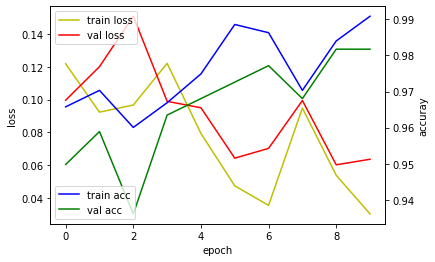

In [40]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [41]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 121.7028 - accuracy: 0.5600
test_loss: 121.70279693603516 
test_accuracy: 0.5600000023841858


-> 모델 구성을 바꾼 결과 56%로 더 나은 결과를 얻을 수 있었으나 여전히 불안정하다.layer을 추가할 때 오류가 나서 두번째 layer뭉터기에 padding = 'same'을 추가하니 더 정확도가 높게 나왔다. 모델 구성을 더 깊게 만들면서 차원이 맞지 않을 땐 padding='same'을 추가해야겠다.

In [79]:
n_channel_1=64
n_channel_2=32
n_channel_3=32
n_channel_4=32
n_dense=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 27, 27, 64)        832       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 26, 26, 64)        16448     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 32)        8224      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 13, 13, 32)        4128      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 32)        

In [83]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=20, batch_size = 10, validation_data=(X_val, y_val))

Epoch 1/20
88/88 [==============================] - 1s 8ms/step - loss: 0.0394 - accuracy: 0.9840 - val_loss: 0.0522 - val_accuracy: 0.9817
Epoch 2/20
88/88 [==============================] - 1s 6ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0150 - val_accuracy: 0.9954
Epoch 3/20
88/88 [==============================] - 1s 6ms/step - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.0259 - val_accuracy: 0.9909
Epoch 4/20
88/88 [==============================] - 1s 6ms/step - loss: 0.0302 - accuracy: 0.9943 - val_loss: 0.0508 - val_accuracy: 0.9817
Epoch 5/20
88/88 [==============================] - 1s 6ms/step - loss: 0.0374 - accuracy: 0.9909 - val_loss: 0.0113 - val_accuracy: 0.9954
Epoch 6/20
88/88 [==============================] - 1s 6ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/20
88/88 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9954
Epoch 8/20
88/88 [==

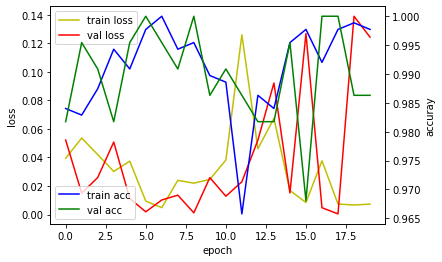

In [84]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [85]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 288.4938 - accuracy: 0.7067
test_loss: 288.49383544921875 
test_accuracy: 0.7066666483879089


-> 모델 구성을 바꾸고 여러 번 시도해 본 결과 정확도가 70%까지 나왔다! 정확도가 50%~60%를 불안정하게 보이다가 우연히 나온 값이지만 지금까지 여러 번 시도해본 결과중에 가장 큰 값이 나왔다. 따라서 이 모델을 바탕으로 에폭수를 높혀서 시도해볼 것이다.

In [92]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/50
88/88 [==============================] - 1s 8ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 1.2123e-04 - val_accuracy: 1.0000
Epoch 2/50
88/88 [==============================] - 1s 6ms/step - loss: 5.5503e-04 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9954
Epoch 3/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.1605 - val_accuracy: 0.9909
Epoch 4/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0949 - accuracy: 0.9852 - val_loss: 0.0271 - val_accuracy: 0.9954
Epoch 5/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0299 - accuracy: 0.9943 - val_loss: 0.0708 - val_accuracy: 0.9909
Epoch 6/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0495 - accuracy: 0.9943 - val_loss: 8.9188e-05 - val_accuracy: 1.0000
Epoch 7/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0625 - accuracy: 0.9932 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/

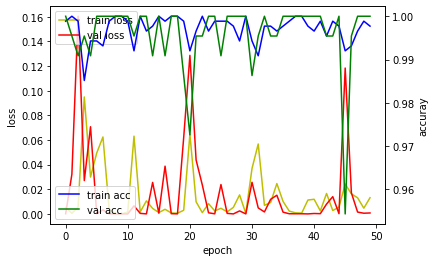

In [93]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [94]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 517.4800 - accuracy: 0.5867
test_loss: 517.4800415039062 
test_accuracy: 0.5866666436195374


-> 무조건 에폭 수가 많아진다고 정확도가 높아지지는 않지만 여러 번 코드를 돌려본 결과 50~60%정도의 정확도를 보인다.

#### 3. 과적합을 막기 위해 train데이터를 더욱 다양하게 만들기
:기본 train 데이터에 c_test, d_test, e_test 300장을 추가하고 a_test, b_test data 200장으로 평가를 시도한다.

In [95]:
# 가위 데이터 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/scissor"
resize_images(image_dir_path)

665  images to be resized.
665  images resized.


In [96]:
# 바위 데이터 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/rock"
resize_images(image_dir_path)

665  images to be resized.
665  images resized.


In [97]:
# 보 데이터 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/paper"
resize_images(image_dir_path)

665  images to be resized.
665  images resized.


In [99]:
# 데이터 불러오기 및 정규화
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2"
(x_train, y_train)=load_data(image_dir_path, 1995)
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1995 입니다.
x_train shape: (1995, 28, 28, 3)
y_train shape: (1995,)


In [100]:
#데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [260]:
# 모델 훈련
hist = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0201 - accuracy: 0.9969 - val_loss: 4.5738e-07 - val_accuracy: 1.0000
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 3.1598e-05 - val_accuracy: 1.0000
Epoch 3/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 1.6570e-06 - val_accuracy: 1.0000
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.0128 - accuracy: 0.9981 - val_loss: 9.2300e-06 - val_accuracy: 1.0000
Epoch 5/20
160/160 [==============================] - 1s 6ms/step - loss: 0.1371 - accuracy: 0.9900 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0337 - accuracy: 0.9912 - val_loss: 1.0904e-04 - val_accuracy: 1.0000
Epoch 7/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 1.9313e-05 - val

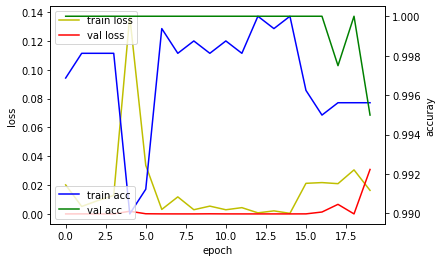

In [261]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [262]:
# a_test
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

#바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

#보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [263]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2218.5249 - accuracy: 0.4433
test_loss: 2218.52490234375 
test_accuracy: 0.44333332777023315


-> 여러 번 시도해본 결과 정확도가 30~50%로 이전에 훈련데이터가 적었을 때보다 더욱 결과가 안나와서 당황스러웠지만 a_test 데이터 자체가 다른 데이터와 다르게 멀리서 찍은 사진으로 구성되어있는 것을 감안하면 이전보다 좋은 결과를 얻을 수 있다는 것에 의의를 두겠다.

In [283]:
# 모델 훈련
hist = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
160/160 [==============================] - 1s 7ms/step - loss: 0.0908 - accuracy: 0.9862 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 4.3957e-04 - val_accuracy: 1.0000
Epoch 3/20
160/160 [==============================] - 1s 6ms/step - loss: 9.4207e-04 - accuracy: 0.9994 - val_loss: 3.3826e-04 - val_accuracy: 1.0000
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0981 - accuracy: 0.9906 - val_loss: 0.0249 - val_accuracy: 0.9975
Epoch 5/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0227 - accuracy: 0.9956 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 2.0129e-05 - val_accuracy: 1.0000
Epoch 7/20
160/160 [==============================] - 1s 6ms/step - loss: 0.0433 - accuracy: 0.9956 - val_loss: 2.4834e-06 - val_acc

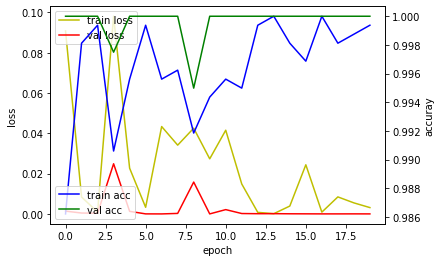

In [284]:
# 학습 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [285]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)

#바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/rock"
resize_images(image_dir_path)

#보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [286]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1430.9258 - accuracy: 0.6067
test_loss: 1430.92578125 
test_accuracy: 0.6066666841506958


-> 여전히 정확도가 불안정하게 30%~60%를 웃돌지만 

# 프로젝트 회고

## 배운점
1.  ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_61/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_61/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [3,3,32,32]. 오류가 떴다. shape을 맞춰주기 위해 padding = 'same'을 추가하여 해결했다.  
  
2. 리눅스 환경을 다루는 것을 반복하다 보니 파일 만들기, zip파일 열기, 여러 파일명 한번에 바꾸기 등의 명령어를 사용하는 것에 익숙해졌다. 이 과정이 제일 귀찮고 힘든 과정이었다.
  
3. 여러 그래프를 twinx()함수를 통하여 하나의 그림으로 나타낼 수 있다는 것을 배웠다. 스크롤을 내릴 필요 없이 한 눈에 볼 수 있어서 좋았다 이를 응용하여 앞으로 더 보기 좋은 그래프를 만들 수 있을 것 같다. 

4. data 수집의 중요성, 배치정규화, drop, epoch, 모델 구성 등의 시도를 하였고 이런 시도들을 통해 오버피팅을 막고 평가 시 정확도를 높힐 수 있다는 것을 배웠다.

## 부족한점
1. 여러 번 반복되는 코드들을 함수로 만들어서 더 보기 좋고 모듈화 되어있는 코드 구성이 되면 더 좋았을 것 같다.

2. 크게 3일을 거쳐서 결과가 바뀌었는데 첫 날에는 train, data와 validaion data를 나누지 않을 때 모델 구성만 바꿔도 정확도 60%를 넘는 것이 기본으로 나와서 이 프로젝트를 쉽게 할 수 있을 것이라고 생각했는데 둘째 날과 셋째 날에 시행할 때는 50% 이상으로 잘 나오지 않아서 너무 힘들었다. 처음에는 데이터량이 부족한 것으로 생각했으나 데이터량을 늘려도 비슷한 것을 보아 단순히 가위, 바위, 보 사진뿐만 아니라 배경의 영향도 큰 것으로 보인다. 이 문제도 데이터량이 많아지면 극복이 될지, 혹으 모델구성이나 다른 요인들을 이용히면 될지 앞으로 더 도전을 해보아야 할 것 같다.


## 종합의견

여러 가지 시도를 하면서 캐글, 데이콘과는 다른 느낌의 도전적인 프로젝트였다. 같은 모델을 돌리는 데도 매번 학습할 때마다 일치하는 패턴 없이 불안정하게 학습되며 정확도도 수치가 계속 크게 바뀌었다. 그러나 원래 목표였던 60%를 넘겨서 뿌듯하다.

# Reference
1. 케라스 sequential model 참고  
https://keras.io/ko/getting-started/sequential-model-guide/    
2. 평가지표   
https://tykimos.github.io/2017/07/09/Training_Monitoring/  
3. 과적합 극복하는 방법  
https://wikidocs.net/61374  
4. 시각화 twinx 설명  
https://heytech.tistory.com/449  
